 
# Alpha and Beta Diversity

Different higher-level measures are often used to describe the microbiome in a sample. These do not provide information on changes in the abundance of specific taxa but allow us to access a broader change or difference in the composition of microorganisms. Alpha and beta diversity are examples of such measures.

Different measures exist to estimate diversity within a single sample, jointly called alpha diversity. The different measures reflect the richness (number) or distribution (evenness) of a microbial sample or aim to reflect a combination of both properties.

Rarefaction curves are often used when calculating alpha diversity indices because increasing numbers of sequenced taxa allow increasingly accurate estimates of total population diversity. Rarefaction curves can therefore be used to estimate the full sample richness, as compared to the observed sample richness.

While alpha diversity is a measure of microbiome diversity applicable to a single sample, beta diversity is a measure of the similarity or dissimilarity of two communities. As for alpha diversity, many indices exist, each reflecting different aspects of community heterogeneity. Key differences relate to how the indices value variation in rare species if they consider presence/absence only or incorporate abundance, and how they interpret shared absence. Bray-Curtis dissimilarity is a popular measure that considers both size (overall abundance per sample) and shape (abundance of each taxon) of the communities (Bray, 1957). Beta diversity is an essential measure for many popular statistical methods in ecology, such as ordination-based methods, and is widely used for studying the association between environmental variables and microbial composition.

In summary, alpha diversity measures can be seen as a summary statistic of a single population (within-sample diversity), while beta diversity measures are estimates of similarity or dissimilarity between populations (between samples).

**Source**: (https://biomcare.com/info/key-terms-in-microbiome-projects/)

### STEP : Diversity Analysis

Using QIIME2 to create diversity analisys graphs and calculations. 


#### Methods
- [diversity](https://docs.qiime2.org/2022.8/plugins/available/diversity/)
- [diversity alpha](https://docs.qiime2.org/2022.8/plugins/available/diversity/alpha/)
- [diversity beta](https://docs.qiime2.org/2022.8/plugins/available/diversity/beta/)
- [diversity core_metrics](https://docs.qiime2.org/2022.8/plugins/available/diversity/core-metrics/)
- [diversity alpha_group_significance](https://docs.qiime2.org/2022.8/plugins/available/diversity/alpha-group-significance/)
- [diversity beta_group_significance](https://docs.qiime2.org/2022.8/plugins/available/diversity/beta-group-significance/)
- [feature_table core_features](https://docs.qiime2.org/2022.8/plugins/available/feature-table/core-features/)
- [feature_table summarize](https://docs.qiime2.org/2022.8/plugins/available/feature-table/summarize/)
- [taxa filter-table](https://docs.qiime2.org/2022.8/plugins/available/taxa/filter-table/)
- [taxa collapse](https://docs.qiime2.org/2022.8/plugins/available/taxa/collapse/)

## Setup and settings

In [15]:
# Importing packages
import os
import pandas as pd
from qiime2 import Artifact
from qiime2 import Visualization
from qiime2 import Metadata

from qiime2.plugins.diversity.pipelines import alpha
from qiime2.plugins.diversity.pipelines import beta
from qiime2.plugins.diversity.pipelines import core_metrics
from qiime2.plugins.diversity.visualizers import alpha_group_significance
from qiime2.plugins.diversity.visualizers import beta_group_significance

from qiime2.plugins.taxa.methods import filter_table
from qiime2.plugins.taxa.methods import collapse


from qiime2.plugins.feature_table.visualizers import summarize
from qiime2.plugins.feature_table.visualizers import core_features


import matplotlib.pyplot as plt

from utils import *

%matplotlib inline

### Receiving the parameters

The following cell can receive parameters using the [papermill](https://papermill.readthedocs.io/en/latest/) tool.

In [8]:
metadata_file = '/home/lauro/nupeb/rede-micro/redemicro-miliane-nutri/data/raw/metadata/miliane-metadata-CxAC.tsv'
base_dir = os.path.join('/', 'home', 'lauro', 'nupeb', 'rede-micro', 'redemicro-miliane-nutri')
experiment_name = 'miliane-CxAC-trim'
replace_files = False

In [9]:
experiment_folder = os.path.abspath(os.path.join(base_dir, 'experiments', experiment_name))
img_folder = os.path.abspath(os.path.join(experiment_folder, 'imgs'))

### Defining names, paths and flags

In [86]:
# QIIME2 Artifacts folder
qiime_folder = os.path.join(experiment_folder, 'qiime-artifacts')

# Input - DADA2 Artifacts
dada2_tabs_path = os.path.join(qiime_folder, 'dada2-tabs.qza')
dada2_reps_path = os.path.join(qiime_folder, 'dada2-reps.qza')
dada2_stat_path = os.path.join(qiime_folder, 'dada2-stat.qza')

# Input - Taxonaomic Artifacts
taxonomy_path = os.path.join(qiime_folder, 'metatax.qza')

# Output -Diversity Artifacts
alpha_diversity_path = os.path.join(qiime_folder, 'alpha-diversity.qza')
alpha_diversity_view_path = os.path.join(qiime_folder, 'alpha-diversity.qzv')
beta_diversity_path = os.path.join(qiime_folder, 'beta-diversity.qza')
beta_diversity_view_path = os.path.join(qiime_folder, 'beta-diversity.qzv')

# Flag - Load or create files
need_tax = not (os.path.isfile(alpha_diversity_path)) or replace_files
need_view = not (os.path.isfile(alpha_diversity_view_path)) or replace_files

## Step execution

### Load input files

This Step import the QIIME2 `FeatureTable[Frequency]` Artifact and the `Metadata` file.

In [87]:
#Load Metadata
metadata_qa = Metadata.load(metadata_file)

#Load FeatureTable[Frequency]
tabs = Artifact.load(dada2_tabs_path)
tabs_df = tabs.view(Metadata).to_dataframe().T

# FeatureData[Sequence]
reps = Artifact.load(dada2_reps_path)

# FeatureData[Taxonomy]
tax = Artifact.load(taxonomy_path)

'/home/lauro/nupeb/rede-micro/redemicro-miliane-nutri/experiments/miliane-CxAC-trim/qiime-artifacts/dada2-core.qzv'

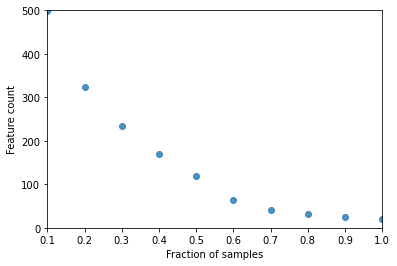

In [40]:

dada2_tabs_view = os.path.join(qiime_folder, 'dada2-tabs.qzv')
dada2_reps_view = os.path.join(qiime_folder, 'dada2-reps.qzv')
dada2_core_view = os.path.join(qiime_folder, 'dada2-core.qzv')

tabs_view = summarize(table=tabs, sample_metadata=metadata_qa).visualization
tabs_view.save(dada2_tabs_view)
reps_view = tabulate_seqs(data=reps).visualization
reps_view.save(dada2_reps_view)
core_view = core_features(table=tabs, min_fraction=.1, steps=10).visualization
core_view.save(dada2_core_view)

In [67]:
import zipfile
from io import StringIO
import pandas as pd
with zipfile.ZipFile(dada2_core_view, 'r') as zip_ref:
    names = [x for x in zip_ref.namelist() if x.endswith('1.000.tsv')]
    print(names)
    with zip_ref.open(names[0]) as myfile:
        txt = str(myfile.read(), 'utf-8')
        txt = StringIO(txt)
        df = pd.read_csv(txt, sep='\t')
        print(df)   

['82634200-9d19-4347-8617-15948ee950d8/data/core-features-1.000.tsv']
                          Feature ID      2%       9%      25%     50%  \
0   c688e3b1ada46ed57f5b7e7e0d56664f  400.74   567.83  3168.50  9079.5   
1   fca5b1ccd94b107a3ddf3e99feaafb6f  812.32  1278.94  2834.25  5627.0   
2   26fb6a43293a39fa4463bc35a69457b2  420.58   643.11  2381.00  3918.0   
3   55b8f708d3561852ca20801e513b08a7  412.98   612.41   900.75  3566.5   
4   ff6880f38ac8c1569873d503a3d53c2a  901.16  1384.72  1836.25  3381.0   
5   bc798de4a9acd3ff7ba51c244523be14  361.44   401.48  1101.00  2853.0   
6   a1bc173c37d38b7a95f6f464d62fa86e  348.68   729.06  1012.50  1532.5   
7   60ad690613589cad95c200968df41bb5  227.00   304.00   454.25  1313.0   
8   33be3de1f8ec58c58a1d87db108d913c  453.74   736.33   924.25  1263.0   
9   bfbcddb34034c8e1327bc8e4a3817f73  445.62   731.29   847.75  1012.0   
10  94da0800673da2590ace91fc6e62c80a   91.86   101.87   377.50   809.5   
11  b6b804323b11530a7bb8c25d42de7c58  341.

## Alpha diversity analysis

#### Reference
- [The Use and Types of Alpha-Diversity Metrics in Microbial NGS](https://www.cd-genomics.com/microbioseq/the-use-and-types-of-alpha-diversity-metrics-in-microbial-ngs.html)
- [Alpha diversity metrics](http://scikit-bio.org/docs/0.2.0/generated/skbio.diversity.alpha.html)

#### Methods
- [diversity alpha](https://docs.qiime2.org/2022.8/plugins/available/diversity/alpha/): Computes a user-specified alpha diversity metric for all samples in a
feature table.
- [diversity alpha_correlation](https://docs.qiime2.org/2022.8/plugins/available/diversity/alpha-correlation/): Determine whether numeric sample metadata columns are correlated with alpha diversity.
- [diversity alpha_group_significance](https://docs.qiime2.org/2022.8/plugins/available/diversity/alpha-group-significance/): Visually and statistically compare groups of alpha diversity values.

In [88]:
alpha_metrics = ('ace', 'berger_parker_d', 'brillouin_d', 'chao1', 'chao1_ci', 'dominance', 'doubles', 'enspie', 'esty_ci', 'fisher_alpha', 'gini_index', 'goods_coverage', 'heip_e', 'kempton_taylor_q', 'lladser_pe', 'margalef', 'mcintosh_d', 'mcintosh_e', 'menhinick', 'michaelis_menten_fit', 'observed_features', 'osd', 'pielou_e', 'robbins', 'shannon', 'simpson', 'simpson_e', 'singles', 'strong')
metric = 'simpson'
alpha_diversity = alpha(table=tabs, metric=metric).alpha_diversity

## Alpha diversity correlation





In [80]:
# # NEED Numeric Metadata
# from qiime2.plugins.diversity.visualizers import alpha_correlation
# methods = ('spearman', 'pearson')
# corr_view = alpha_correlation(alpha_diversity=alpha_diversity, metadata=metadata_qa, method=methods[1], intersect_ids=True).visualization
# corr_view

## Alpha diversity comparisons

Visually and statistically compare groups of alpha diversity values.

[diversity alpha_group_significance](https://docs.qiime2.org/2022.8/plugins/available/diversity/alpha-group-significance/)

In [ ]:
alpha_group_significance(alpha_diversity=alpha_diversity, metadata=metadata_qa)

## Beta diversity analysis

#### Reference
- [Beta diversity metrics](http://scikit-bio.org/docs/0.2.0/generated/skbio.diversity.beta.html)